In [13]:
from numpy import zeros, array
from matplotlib.pyplot import subplots, imshow, show
from matplotlib.animation import FuncAnimation, ImageMagickFileWriter


class GridAnimation:
    def __init__(self, shape : tuple, n_frames : int):
        self.shape = shape
        self.n_frames = n_frames
        self.frames = zeros((n_frames, *shape))
        self.current_frame_index = 0
        self.fig = None
        self.ax = None
        self.im = None
        
        self.init_animation()

    def add_frame(self, frame : array):
        self.__set_current_frame(self.current_frame_index + 1)
        self.frames[self.current_frame_index,:,:] = frame

    def __set_current_frame(self, new_frame_index : int):
        if new_frame_index >= self.n_frames:
            raise ValueError("n_frames is not enough")
        else:
            self.current_frame = new_frame_index

    def __update(self, *args):
        self.im.set_array(self.frames[self.current_frame_index])
        self.__set_current_frame(self.current_frame_index + 1)
        return self.im

    def init_animation(self, origin='lower'):
        self.fig, self.ax = subplots(figsize=self.shape)
        self.__set_current_frame(0)
        # self.im = imshow(self.frames[self.current_frame_index], origin=origin)

    def show(self, interval=500):
        ani = FuncAnimation(self.fig, self.__update, interval=interval)
        show()

    def save(self, filename="GridAnimation.gif", fps=2):
        ani = FuncAnimation(self.fig, self.__update, self.n_frames)
        writer = ImageMagickFileWriter(fps=fps)
        ani.save(filename, writer=writer) 



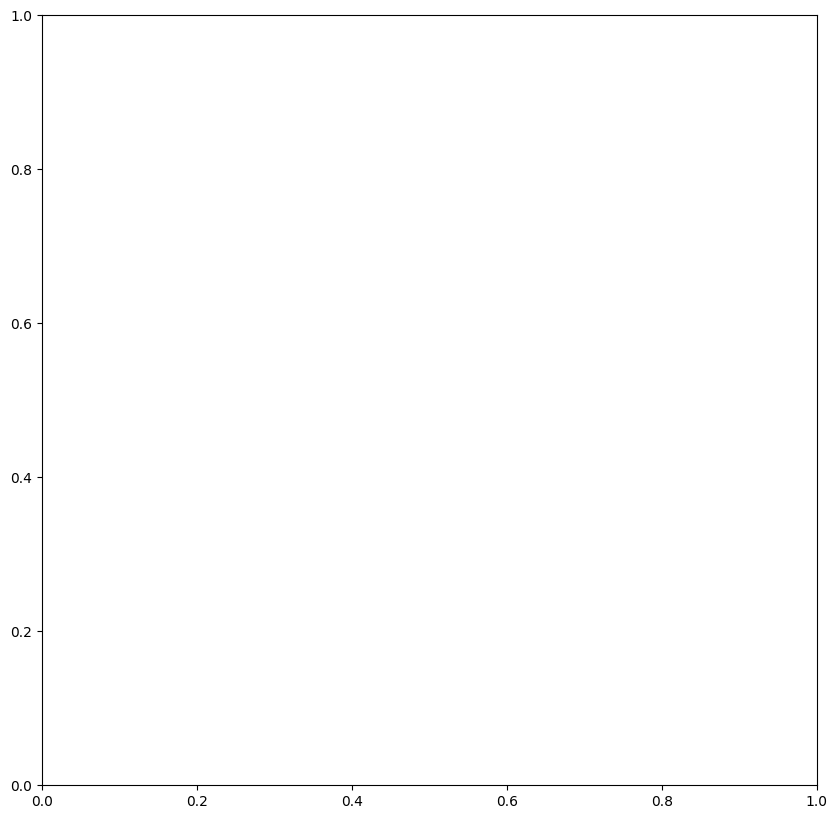

In [14]:
import numpy as np
anim = GridAnimation(shape=(10,10), n_frames=100)
for _ in range(100):
    anim.add_frame(frame = np.random.randint(low=0, high=100, size=(10,10)))
anim.show()



In [11]:
np.random.randint(low=0, high=100, size=(10,10))

array([[47, 73, 31, 70, 45, 69, 85,  8, 36, 14],
       [88, 25, 33, 87, 25, 89, 64, 96, 37, 42],
       [16, 26, 96, 17, 18, 39, 90, 93, 63, 55],
       [54,  3, 80, 70, 81, 90, 50, 52, 33, 73],
       [75, 33, 56, 16, 54, 62, 86, 52, 89, 31],
       [90, 13, 84, 76,  2, 64, 78, 30, 97, 43],
       [77, 69, 40, 66, 85, 40, 86, 71, 12, 79],
       [63, 10, 59, 17, 96, 71, 92, 71, 54, 27],
       [66, 95,  9, 81, 86, 19, 74,  0, 36, 67],
       [51, 31, 34,  3, 81,  2, 79, 22,  2, 32]])

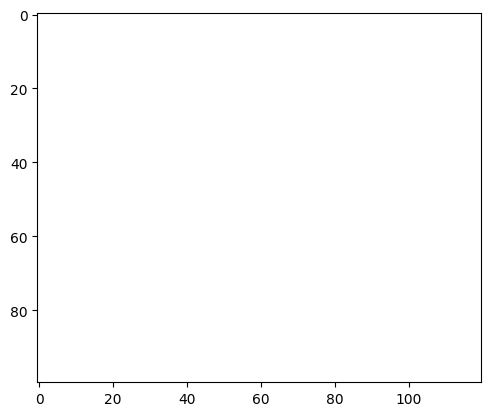

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()

def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y))
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
    repeat_delay=1000)

#ani.save('dynamic_images.mp4')


plt.show()